In [4]:
import numpy as np
import rasterio as rs
import h5py
import matplotlib.pyplot as plt
import tables
import os

In [5]:
path = 'data/merged_shuffled/GLOBAL_GEDI_train.h5'

In [ ]:
def copy_node(node, h5_file_out, parent_path='/'):
    for child in node:
        child_path = f"{parent_path}{child._v_name}"
        if isinstance(child, tables.Array):
            data = child[:]
            if child._v_name == 'canopy_height':
                data = np.where(data == 0.0, np.nan, data)
            h5_file_out.create_array(parent_path, child._v_name, data)
        elif isinstance(child, tables.Group):
            h5_file_out.create_group(parent_path, child._v_name)
            copy_node(child, h5_file_out, f"{child_path}/")

with tables.open_file(path, 'r') as h5_file_in:
    with tables.open_file('modified_file.h5', 'w') as h5_file_out:
        copy_node(h5_file_in.root, h5_file_out)

In [6]:
h5file = tables.open_file(path, mode="r")

images = h5file.root.images[:1000]
canopy_height = h5file.root.canopy_height[:1000]
lat = h5file.root.lat[:1000]
lon = h5file.root.lon[:1000]

In [ ]:
# with tables.open_file("modified_file.h5", mode="r") as h5file:
#     print(h5file.root)

/ (RootGroup) ''


In [8]:
chm = h5file.root.canopy_height[:]

In [10]:
np.sum(~np.isnan(chm))

16781535

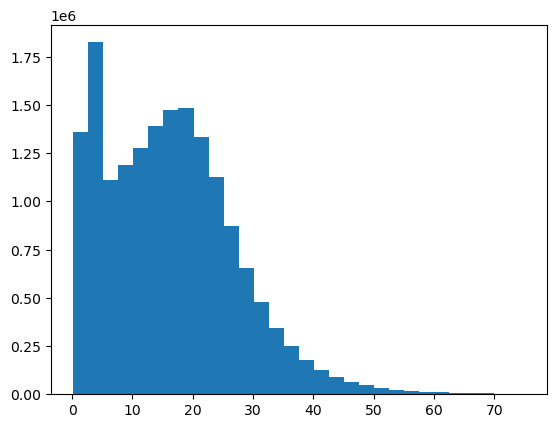

In [11]:
plt.hist(x=chm.flatten(), bins=30)
plt.show()

In [12]:
values, counts = np.unique(chm, return_counts=True)


In [13]:

for v, c in zip(values, counts):
    print(v, c)

0.18 81
0.29 54
0.37 54
0.56 46
0.71 81
0.74 27
0.93 22
1.08 90
1.12 6
1.16 72
1.19 135
1.23 153
1.26 81
1.3 12
1.31 6
1.34 54
1.38 117
1.41 81
1.42 90
1.49 12
1.52 38
1.53 18
1.57 14
1.6 100
1.61 18
1.64 82
1.68 114
1.74 54
1.75 18
1.76 20
1.78 20
1.79 11
1.82 15
1.83 138
1.86 84
1.87 24
1.9 192
1.91 54
1.93 12
1.94 475
1.97 198
1.98 279
2.01 261
2.02 360
2.05 275
2.06 121
2.08 28
2.09 350
2.12 54
2.13 422
2.15 117
2.16 126
2.17 948
2.19 320
2.2 827
2.21 1361
2.23 176
2.24 6120
2.27 306
2.28 13838
2.31 1055
2.32 33572
2.34 147
2.35 16621
2.36 45008
2.38 108
2.39 90837
2.42 1224
2.43 123348
2.45 84
2.46 12231
2.47 150756
2.49 303
2.5 129890
2.51 54438
2.52 54
2.53 1698
2.54 190327
2.56 111
2.57 18353
2.58 159303
2.6 563
2.61 44461
2.62 114454
2.63 6
2.64 1803
2.65 117078
2.66 22464
2.67 78
2.68 9217
2.69 125004
2.71 1405
2.72 36003
2.73 81087
2.75 2021
2.76 40740
2.77 55385
2.78 36
2.79 7862
2.8 73070
2.81 4871
2.82 437
2.83 8994
2.84 63355
2.86 1827
2.87 20515
2.88 40320
2.9 2803
2.91

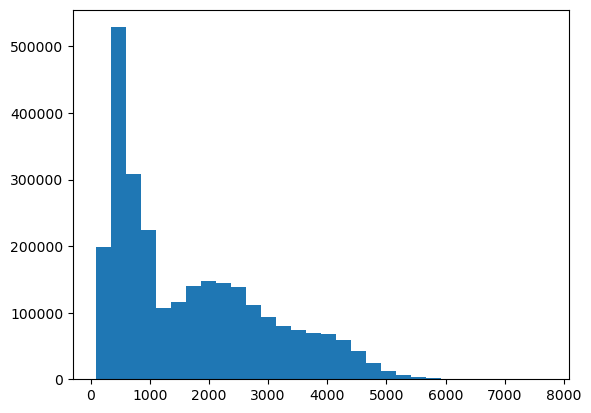

In [46]:
s2 = images.flatten()
height = canopy_height.flatten()
plt.hist(x=s2, bins=30)
plt.show()

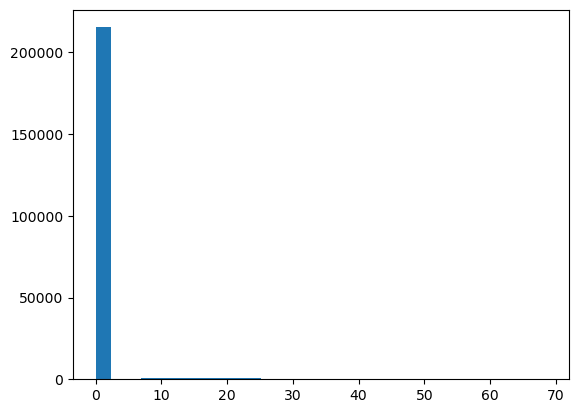

In [47]:
plt.hist(x=height, bins=30)
plt.show()

In [48]:
np.var(s2), np.mean(s2)

(1650686.228987076, 1688.48046)

In [49]:
np.mean(height), np.var(height)

(0.9143212, 23.726313)

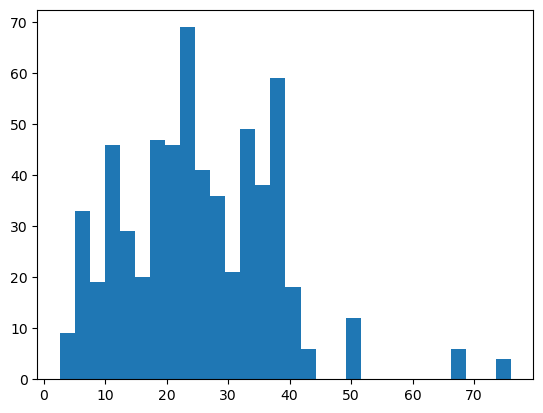

In [50]:
dataset = rs.open("data_sample/GEDI_00/GEDI_export_0001_3403_02_2021.tif")
dataset = dataset.read(1)
plt.hist(x=dataset.flatten(), bins=30)
plt.show()

In [51]:
folder = 'data_sample/gedi_0001_3403_02_2021'
data = []
for file in os.listdir(folder):
    if not file.endswith(".tif"):
        continue
    path = os.path.join(folder, file)
    dataset = rs.open(path)
    dataset = dataset.read(1)
    dataset = dataset[~np.isnan(dataset)]
    
    data.extend(dataset.flatten().tolist())


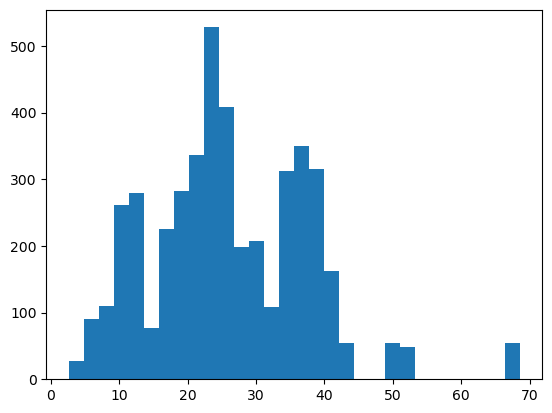

In [52]:
plt.hist(x=data, bins=30)
plt.show()